In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt


In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect,desc
from sqlalchemy.sql import func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
conn=engine.connect()

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [10]:
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [11]:
columns = inspector.get_columns('Measurement')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [12]:
columns = inspector.get_columns('Station')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [13]:
#To get the Latest date
latest_date=session.query(Measurement.date).order_by(Measurement.date.desc()).first().date
latest_date

'2017-08-23'

In [14]:
# date 1 year  ago from latest date
year_ago = dt.datetime.strptime(latest_date,'%Y-%m-%d') - dt.timedelta(days=365)
print(year_ago)

2016-08-23 00:00:00


In [15]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
#engine.execute('SELECT date FROM Measurement LIMIT 10').fetchall()


In [16]:
# Query All Records in the Measurement Table
#Meas_data = pd.read_sql("SELECT * FROM Measurement", conn)
#Meas_data.head()

In [17]:
# Query All Records in the Station Table
#station_data = pd.read_sql("SELECT * FROM Station", conn)
#station_data.head()

In [18]:
#Meas_stat=session.query(SELECT * FROM Measurement INNER JOIN ON Measurement.id =Station.id)

#combined_data = pd.merge(Meas_data, station_data ,on="station", how="inner")
#combined_data.head()

In [19]:
## Query the last 12 months of temperature observation data for this station
date_prcp_measure=session.query(Measurement.date,Measurement.prcp).\
    filter(Measurement.date >= year_ago).\
     order_by(Measurement.date).all()
date_prcp_measure

[('2016-08-24', 0.08),
 ('2016-08-24', 2.15),
 ('2016-08-24', 2.28),
 ('2016-08-24', None),
 ('2016-08-24', 1.22),
 ('2016-08-24', 2.15),
 ('2016-08-24', 1.45),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.21),
 ('2016-08-25', 0.06),
 ('2016-08-25', 0.11),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.03),
 ('2016-08-26', 0.02),
 ('2016-08-26', 0.04),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.01),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.18),
 ('2016-08-27', 0.02),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.12),
 ('2016-08-27', None),
 ('2016-08-28', 0.01),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.6),
 ('2016-08-28', 2.07),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.17),
 ('2016-08-29', 0.04),
 ('2016-08-29', None),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.35),
 ('2016-08-29', 0.9),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.02),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.0),
 (

In [20]:
## Perform a query to retrieve the data and precipitation scores 
#create a dataframe
date_prcp = pd.DataFrame(date_prcp_measure, columns=['date','prcp'])
#date_tobs_df=date_tobs_df.dropna(how='all', axis=0)
date_prcp.head()

,date,prcp
0,2016-08-24,0.08
1,2016-08-24,2.15
2,2016-08-24,2.28
3,2016-08-24,NaN
4,2016-08-24,1.22


In [79]:
# Calculate the date 1 year ago from the last data point in the database
# Perform a query to retrieve the data and precipitation scores 
#date_prcp = pd.read_sql("SELECT date, prcp FROM Measurement WHERE date <= '2017-08-23' AND date >= '2016-08-23' ORDER BY date ", conn)
#date_prcp.head()


In [82]:
# Sort the dataframe by date and set the index to the date column
date_prcp.set_index('date')
date_prcp.head()


,date,prcp
0,2016-08-23,0.00
1,2016-08-23,0.15
2,2016-08-23,0.05
3,2016-08-23,NaN
4,2016-08-23,0.02


In [83]:
# Use Pandas to calcualte the summary statistics for the precipitation data
date_prcp.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


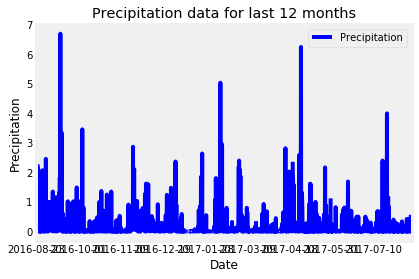

In [84]:
# Use Pandas Plotting with Matplotlib to plot the data
date_prcp.plot('date','prcp', color='blue')

plt.title('Precipitation data for last 12 months')
plt.xlabel('Date')
plt.ylabel('Precipitation')
plt.grid()
plt.legend(["Precipitation"],loc="best")
# Save the Figure
plt.savefig("Images/precipitation.png")
plt.show()

In [25]:
columns = inspector.get_columns('station')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [26]:
# Design a query to show how many stations are available in this dataset?
engine.execute('SELECT COUNT(station) FROM station').fetchall()

[(9,)]

In [27]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
total_stations=engine.execute("SELECT station , COUNT(*) AS Activestation FROM measurement GROUP BY station ORDER BY Activestation DESC").fetchall()
total_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [28]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
sel = [func.min(Measurement.tobs), 
       func.max(Measurement.tobs), 
       func.avg(Measurement.tobs)] 

temp_summary = session.query(*sel).\
    filter(Measurement.station == 'USC00519281').\
    group_by(Measurement.station).\
    order_by(Measurement.station).all()
temp_summary


[(54.0, 85.0, 71.66378066378067)]

In [29]:
# date 1 year  ago from latest date
year_ago = dt.datetime.strptime(latest_date,'%Y-%m-%d') - dt.timedelta(days=365)
print(year_ago)

## Query the last 12 months of temperature observation data for this station
date_tobs=session.query(Measurement.date,Measurement.tobs).\
    filter(Measurement.date >= year_ago).filter(Measurement.station == "USC00519281").\
     order_by(Measurement.date).all()
date_tobs

2016-08-23 00:00:00


[('2016-08-24', 77.0),
 ('2016-08-25', 80.0),
 ('2016-08-26', 80.0),
 ('2016-08-27', 75.0),
 ('2016-08-28', 73.0),
 ('2016-08-29', 78.0),
 ('2016-08-30', 77.0),
 ('2016-08-31', 78.0),
 ('2016-09-01', 80.0),
 ('2016-09-02', 80.0),
 ('2016-09-03', 78.0),
 ('2016-09-04', 78.0),
 ('2016-09-05', 78.0),
 ('2016-09-06', 73.0),
 ('2016-09-07', 74.0),
 ('2016-09-08', 80.0),
 ('2016-09-09', 79.0),
 ('2016-09-10', 77.0),
 ('2016-09-11', 80.0),
 ('2016-09-12', 76.0),
 ('2016-09-13', 79.0),
 ('2016-09-14', 75.0),
 ('2016-09-15', 79.0),
 ('2016-09-16', 78.0),
 ('2016-09-17', 79.0),
 ('2016-09-18', 78.0),
 ('2016-09-19', 78.0),
 ('2016-09-20', 76.0),
 ('2016-09-21', 74.0),
 ('2016-09-22', 77.0),
 ('2016-09-23', 78.0),
 ('2016-09-24', 79.0),
 ('2016-09-25', 79.0),
 ('2016-09-26', 77.0),
 ('2016-09-27', 80.0),
 ('2016-09-28', 78.0),
 ('2016-09-29', 78.0),
 ('2016-09-30', 78.0),
 ('2016-10-01', 77.0),
 ('2016-10-02', 79.0),
 ('2016-10-03', 79.0),
 ('2016-10-04', 79.0),
 ('2016-10-05', 79.0),
 ('2016-10-

In [30]:
date_tobs_df = pd.DataFrame(date_tobs, columns=['Date','tobs'])
date_tobs_df=date_tobs_df.dropna(how='all', axis=0)
date_tobs_df.head()

,Date,tobs
0,2016-08-24,77.0
1,2016-08-25,80.0
2,2016-08-26,80.0
3,2016-08-27,75.0
4,2016-08-28,73.0


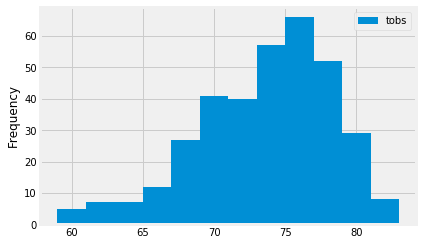

In [78]:
plt.hist(date_tobs_df['tobs'],12) 
#plot.xlabel('')
plt.ylabel('Frequency')
plt.legend(["tobs"],loc="best")
plt.savefig("Images/temperature.histogram.png")
plt.show()

![precipitation](Images/station-histogram.png)

In [32]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [33]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.

from datetime import datetime

def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d"""
    start_date1 = '2017-06-10'
    end_date1 = '2017-06-20'
        
    start_date =datetime.strptime(start_date1, '%Y-%m-%d')
    end_date = datetime.strptime(end_date1, '%Y-%m-%d')
        
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2017-06-10', '2017-06-20'))

[(72.0, 76.92307692307692, 83.0)]


In [75]:
#Getting start date and end date from user
Startdate = str(input('startdate:'))
Enddate=str(input('Enddate:'))

start_date = datetime.strptime(Startdate, '%Y-%m-%d')
End_date=datetime.strptime(Enddate, '%Y-%m-%d')

# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
#year_ago = dt.datetime.strptime(i,'%Y-%m-%d') - dt.timedelta(days=365)
year_ago=dt.timedelta(days=365)
#print(year_ago)

#last year Min,AVG,Max temperature for the current trip date
temp_last_year=calc_temps((start_date-year_ago),(End_date-year_ago))
print(temp_last_year)


startdate:2015-12-20
Enddate:2016-01-02
[(72.0, 76.92307692307692, 83.0)]


In [61]:
#creating dataframe for the avg temperature result
avg_tobs = pd.DataFrame(temp_last_year, columns=['Min_Temp','Avg_Temp','Max_Temp'])
avg_tobs



,Min_Temp,Avg_Temp,Max_Temp
0,72.0,76.923077,83.0


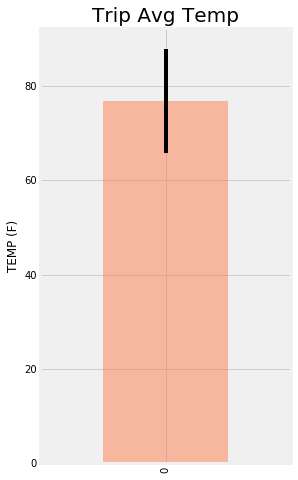

In [62]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
Trip_avg_temp=avg_tobs['Avg_Temp']
min_max_temp=avg_tobs.iloc[0]['Max_Temp']-avg_tobs.iloc[0]['Min_Temp']
Trip_avg_temp.plot(kind='bar',yerr=min_max_temp,figsize=(4,8), alpha=0.5, color='coral')
plt.ylabel("TEMP (F)")
plt.title("Trip Avg Temp",fontsize=20)

#save and show the image
plt.savefig("Images/temperature.Temperature.png")
plt.show()


In [65]:
Meas_data = pd.read_sql("SELECT * FROM Measurement", conn)
station_data = pd.read_sql("SELECT * FROM Station", conn)
combined_data = pd.merge(Meas_data, station_data ,on="station", how="inner")
combined_data.head()


,id_x,station,date,prcp,tobs,id_y,name,latitude,longitude,elevation
0,1,USC00519397,2010-01-01,0.08,65.0,1,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
1,2,USC00519397,2010-01-02,0.00,63.0,1,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
2,3,USC00519397,2010-01-03,0.00,74.0,1,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
3,4,USC00519397,2010-01-04,0.00,76.0,1,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
4,5,USC00519397,2010-01-06,NaN,73.0,1,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0


In [86]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
start_year_ago = start_date - dt.timedelta(days=365)
end_year_ago = End_date - dt.timedelta(days=365)
print(start_year_ago)
print(end_year_ago)

Total_rainfall=session.query(Measurement.station,func.sum(Measurement.prcp)).\
               filter(Measurement.date >= start_year_ago).\
               filter(Measurement.date <= end_year_ago).group_by(Measurement.station).\
               order_by(desc(func.sum(Measurement.prcp))).subquery()
# sel = [Station.station,Station.name,Station.latitude,Station.longitude]
precp_avg=session.query(Station.station,Station.name,Station.latitude,Station.longitude,Total_rainfall).\
            join(Total_rainfall,Station.station==Total_rainfall.c.station).all()
#print(precp_avg)
for rec in precp_avg:
    print(rec)

2014-12-20 00:00:00
2015-01-02 00:00:00
('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 'USC00519397', 1.08)
('USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 'USC00513117', 3.169999999999999)
('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 'USC00514830', 0.58)
('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 'USC00517948', 0.16)
('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 'USC00519523', 3.6900000000000004)
('USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 'USC00519281', 3.19)
('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 'USC00511918', 0.8099999999999999)
('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 'USC00516128', 5.07)


## Optional Challenge Assignment

In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
